In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

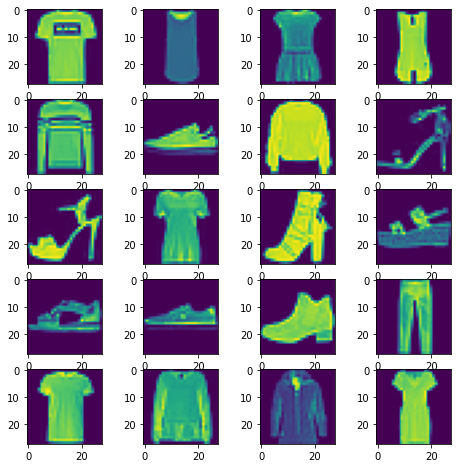

In [3]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [4]:
print("before: "+str(X_train.shape))
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
print("after: "+str(X_train.shape))

before: (60000, 28, 28)
after: (60000, 28, 28, 1)


In [5]:
print("before: "+str(y_train.shape))
# one hot encode target values
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print("after: "+str(y_train.shape))

before: (60000,)
after: (60000, 10)


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=25, batch_size=512)

Epoch 1/25
118/118 [==============================] - 4s 14ms/step - loss: 1.0788 - accuracy: 0.6206
Epoch 2/25
118/118 [==============================] - 2s 13ms/step - loss: 0.4447 - accuracy: 0.8397
Epoch 3/25
118/118 [==============================] - 2s 13ms/step - loss: 0.3722 - accuracy: 0.8651
Epoch 4/25
118/118 [==============================] - 2s 13ms/step - loss: 0.3371 - accuracy: 0.8776
Epoch 5/25
118/118 [==============================] - 2s 13ms/step - loss: 0.3071 - accuracy: 0.8876
Epoch 6/25
118/118 [==============================] - 1s 13ms/step - loss: 0.2825 - accuracy: 0.8974
Epoch 7/25
118/118 [==============================] - 2s 13ms/step - loss: 0.2666 - accuracy: 0.9032
Epoch 8/25
118/118 [==============================] - 2s 13ms/step - loss: 0.2478 - accuracy: 0.9095
Epoch 9/25
118/118 [==============================] - 2s 13ms/step - loss: 0.2471 - accuracy: 0.9091
Epoch 10/25
118/118 [==============================] - 2s 13ms/step - loss: 0.2285 - accura

In [8]:
val_loss,val_accuracy=model.evaluate(X_test,y_test)
print(val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2756 - accuracy: 0.9130
0.9129999876022339
